<a href="https://colab.research.google.com/github/PawelS01/lecture1PS/blob/main/PUM4_regresja_todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

zaczytanie niezbędnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler

zaczytaj dane dotyczace sprzedazy

In [8]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-8-72cc2aa30810>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 18.9k/18.9k [00:00<00:00, 20.4MB/s]

First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


preprocessing

1.   sprawdż typy danych
2.   zmien etykiedy na zmienne liczbowe
3. w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością



In [29]:
print("Typy danych:")
print(df.dtypes)

print("\nBrakujące dane:")
print(df.isnull().sum())

from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in df.columns:
    if col in numeric_columns:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nPo przetworzeniu - brakujące dane:")
print(df.isnull().sum())

Typy danych:
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Brakujące dane:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

Po przetworzeniu - brakujące dane:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


<ipython-input-29-2d33edb19c16>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Podziel zbiór danych na testowy i treningowy w stosunku 30/70

1.   Element listy
2.   Element listy



In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)

Rozmiar zbioru treningowego: (262, 5)
Rozmiar zbioru testowego: (113, 5)


Stworz model regresji liniowej korzystajac z parametrów domyślnych
Przykład dokumentacji: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji

In [34]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev_score = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Średni błąd kwadratowy (MSE):", mse)
print("Średni błąd absolutny (MAE):", mae)
print("Wynik wyjaśnionej wariancji:", ev_score)
print("Współczynnik determinacji R²:", r2)


Średni błąd kwadratowy (MSE): 251384617.98392048
Średni błąd absolutny (MAE): 10976.816634914625
Wynik wyjaśnionej wariancji: 0.8830175673765588
Współczynnik determinacji R²: 0.8821304345871546


spróbuj poprawić model, zacznij od danych, sprawdz korelacje, znormalizuj

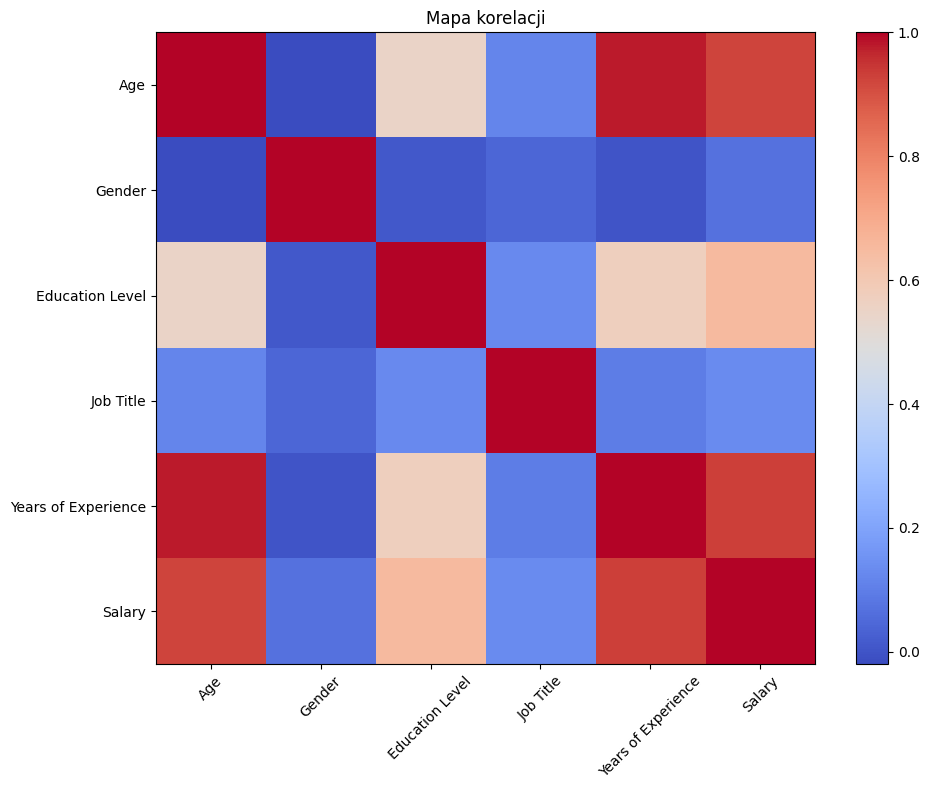


Wyniki ulepszonego modelu:
MSE: 251384617.9839206
MAE: 10976.816634914625
Wyjaśniona wariancja: 0.8830175673765588
R²: 0.8821304345871546


In [35]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Mapa korelacji")
plt.tight_layout()
plt.show()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_improved = LinearRegression()
model_improved.fit(X_train_scaled, y_train)
y_pred_improved = model_improved.predict(X_test_scaled)

print("\nWyniki ulepszonego modelu:")
print("MSE:", mean_squared_error(y_test, y_pred_improved))
print("MAE:", mean_absolute_error(y_test, y_pred_improved))
print("Wyjaśniona wariancja:", explained_variance_score(y_test, y_pred_improved))
print("R²:", r2_score(y_test, y_pred_improved))

Zbuduj model regresji odpornej i przetestuj jego predykcje

Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

In [36]:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

print("Wyniki modelu Ridge:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Wyjaśniona wariancja:", explained_variance_score(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))


Wyniki modelu Ridge:
MSE: 250989078.90153447
MAE: 10962.572842664453
Wyjaśniona wariancja: 0.8831897700305235
R²: 0.8823158954960938


Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

IndexError: index 172 is out of bounds for axis 0 with size 113

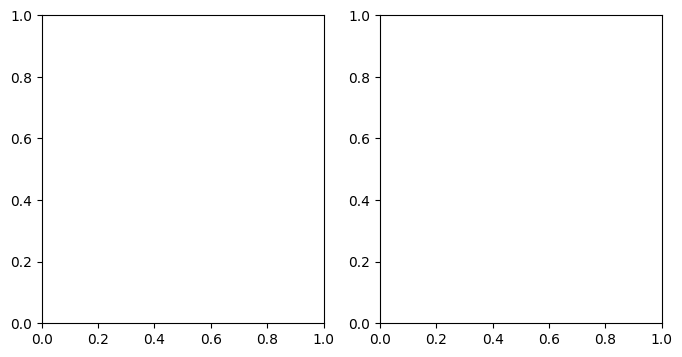

In [39]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

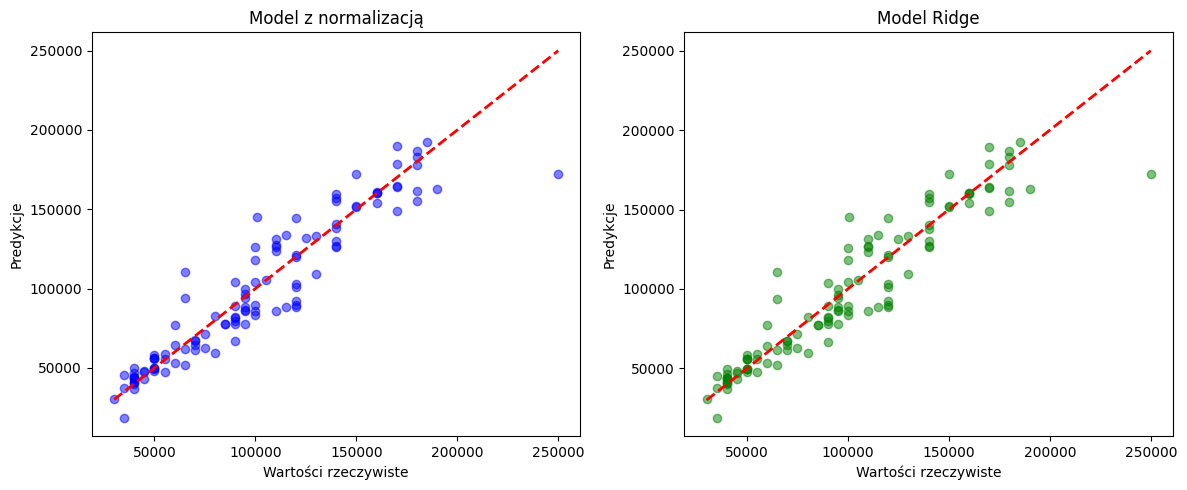

In [38]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_improved, c='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Predykcje')
plt.title('Model z normalizacją')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, c='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Predykcje')
plt.title('Model Ridge')

plt.tight_layout()
plt.show()